# Introducción al TP2- Notebook sacado de la página oficial

## Set up inicial

In [54]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

## Carga de datos

Se cargan las columnas con formatos adecuados según el tipo de datos. Se usa como índice building_id

In [74]:
# Train values
# Levantar los datos de cada edificio/casa
df = pd.read_csv('datos/train_values.csv',nrows=0)
columnas = df.columns.to_list()
datatypes = {
    **{columnas[0]:np.int32}\
    , **{column:np.int16 for column in columnas[1:8] + columnas[27:28]}\
    , **{column:'category' for column in columnas[8:15] + columnas[26:27]}\
    , **{column:np.bool for column in columnas[15:26] + columnas[28:39]}
}
train_values = pd.read_csv('datos/train_values.csv',dtype=datatypes)
train_values = train_values.set_index("building_id")

In [75]:
# train_values = pd.read_csv('datos/train_values.csv',index_col='building_id')

In [76]:
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,False,False,False,False,False,False,False,False,False,False
28830,8,900,2812,2,10,8,7,o,r,n,...,False,False,False,False,False,False,False,False,False,False
94947,21,363,8973,2,10,5,5,t,r,n,...,False,False,False,False,False,False,False,False,False,False
590882,22,418,10694,2,10,6,5,t,r,n,...,False,False,False,False,False,False,False,False,False,False
201944,11,131,1488,3,30,8,9,t,r,n,...,False,False,False,False,False,False,False,False,False,False


In [77]:
#Train labels
train_labels = pd.read_csv('datos/train_labels.csv',index_col='building_id')

In [78]:
train_labels.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


<AxesSubplot:title={'center':'Number of Buildings with Each Damage Grade'}>

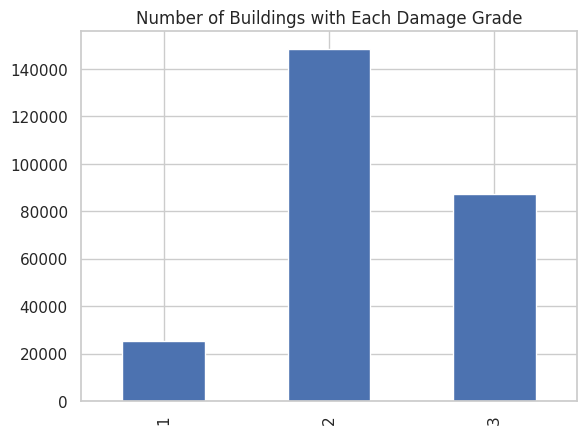

In [79]:
(train_labels.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade"))

In [80]:
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_cement_mortar_stone']

train_values_subset = train_values[selected_features]

In [81]:
train_values_subset.head()

,foundation_type,area_percentage,height_percentage,count_floors_pre_eq,land_surface_condition,has_superstructure_cement_mortar_stone
building_id,,,,,,
802906,r,6,5,2,t,False
28830,r,8,7,2,o,False
94947,r,5,5,2,t,False
590882,r,6,5,2,t,False
201944,r,8,9,3,t,False


In [82]:
## Tarda mil años xd
##sns.pairplot(train_values_subset.join(train_labels), 
##             hue='damage_grade')

## Preprocessing the data

In [83]:
## Convierte las variables categóricas en columnas booleanas a 0 o 1. 
## Por ej land_surface_condition tiene 3 tipos: n, o, t. Se crean 3 columnas para cada registro y según sea n,o,t va a tener 1 en la respectiva columna y 0 en las otras 2.
train_values_subset = pd.get_dummies(train_values_subset)

In [84]:
train_values_subset.head()

,area_percentage,height_percentage,count_floors_pre_eq,has_superstructure_cement_mortar_stone,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t
building_id,,,,,,,,,,,,
802906,6,5,2,False,0,0,1,0,0,0,0,1
28830,8,7,2,False,0,0,1,0,0,0,1,0
94947,5,5,2,False,0,0,1,0,0,0,0,1
590882,6,5,2,False,0,0,1,0,0,0,0,1
201944,8,9,3,False,0,0,1,0,0,0,0,1


In [85]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# the model
from sklearn.ensemble import RandomForestClassifier

# for combining the preprocess with model training
from sklearn.pipeline import make_pipeline

# for optimizing the hyperparameters of the pipeline
from sklearn.model_selection import GridSearchCV


Armado de pipeline

In [86]:
pipe = make_pipeline(StandardScaler(), 
                     RandomForestClassifier(random_state=2018))
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=2018))])

Crea el "tablero" de parámetros y sus dimensiones.

In [87]:
param_grid = {'randomforestclassifier__n_estimators': [50, 100],
              'randomforestclassifier__min_samples_leaf': [1, 5]}
gs = GridSearchCV(pipe, param_grid, cv=5)

Busqueda de los parámetros - Tarda alrededor de 2 minutos

In [88]:
gs.fit(train_values_subset, train_labels.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=2018))]),
             param_grid={'randomforestclassifier__min_samples_leaf': [1, 5],
                         'randomforestclassifier__n_estimators': [50, 100]})

In [89]:
gs.best_params_

{'randomforestclassifier__min_samples_leaf': 5,
 'randomforestclassifier__n_estimators': 100}

In [90]:
from sklearn.metrics import f1_score

in_sample_preds = gs.predict(train_values_subset)
f1_score(train_labels, in_sample_preds, average='micro')

0.5894183061461775

## Time to Predict and Submit

In [15]:
test_values = pd.read_csv('datos/test_values.csv', index_col='building_id')

In [16]:
test_values_subset = test_values[selected_features]
test_values_subset = pd.get_dummies(test_values_subset)

Predictions

In [17]:
predictions = gs.predict(test_values_subset)

Save submit

In [18]:
submission_format = pd.read_csv('datos/submission_format.csv', index_col='building_id')

In [19]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [20]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,2
421793,2


In [21]:
my_submission.to_csv('submission.csv')

In [22]:
!head submission.csv

building_id,damage_grade
300051,3
99355,2
890251,2
745817,2
421793,2
871976,2
691228,2
896100,3
343471,2
